### Import libraries here

In [1]:
libPath = '/home/mayank/Documents/upgraded-octo-lamp/'
import sys
sys.path.append(libPath)
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

from v2i.src.core.common import loadPKL

## Data files

In [2]:
onlyLV10mPath = "/home/mayank/ray_results/homogeneous-with-tf-LV-40m/onlyLocalView10m_gamma_0.999_shared_vf/data_tf_enabled.pkl"
onlyLV40mPath = "/home/mayank/ray_results/homogeneous-with-tf-LV-40m/onlyLocalView40m_gamma_0.999_shared_vf/data_tf_enabled.pkl"
FC40mPath = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40m_gamma_0.999_vf_shared_part_2/data_tf_enabled.pkl'
FC40mdelayedPath = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/PPO_v2i-v0_0_2019-12-08_00-49-11bpwkgwpr/data_tf_enabled.pkl'
FC40mAgePath = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40Age-delayed-age-part-2/data_tf_enabled.pkl'
FC40mAgev2Path = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40Age-age-v2-part-1/data_tf_enabled.pkl'

# no tf lights
FC40mPathNoTF = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40m_gamma_0.999_vf_shared_part_2/data_tf_disabled.pkl'
FC40mdelayedNoTFPath = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/PPO_v2i-v0_0_2019-12-08_00-49-11bpwkgwpr/data_tf_disabled.pkl'
onlyLV10mNoTFPath = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/onlyLocalView10m_gamma_0.999_shared_vf/data_tf_disabled.pkl'
onlyLV40mNoTFPath = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/onlyLocalView40m_gamma_0.999_shared_vf/data_tf_disabled.pkl'
FC40mAgePathNoTF = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40Age-delayed-age-part-2/data_tf_disabled.pkl'
FC40mAgev2PathNoTF = '/home/mayank/ray_results/homogeneous-with-tf-LV-40m/fullComm40Age-age-v2-part-1/data_tf_disabled.pkl'

## Load all data

In [3]:
onlyLV10mData = loadPKL(onlyLV10mPath)
onlyLV40mData = loadPKL(onlyLV40mPath)
FC40mData = loadPKL(FC40mPath)
FC40mAgeData = loadPKL(FC40mAgePath)
FC40mAgev2Data = loadPKL(FC40mAgev2Path)
FC40mdelayedData = loadPKL(FC40mdelayedPath)

# no tf lights
FC40mDataNoTF = loadPKL(FC40mPathNoTF)
FC40mdelayedDataNoTF = loadPKL(FC40mdelayedNoTFPath)
FC40mAgeDataNoTF = loadPKL(FC40mAgePathNoTF)
FC40mAgev2DataNoTF = loadPKL(FC40mAgev2PathNoTF)
onlyLV10mDataNoTF = loadPKL(onlyLV10mNoTFPath)
onlyLV40mDataNoTF = loadPKL(onlyLV40mNoTFPath)

# Get density

In [4]:
episodesDensity = list(onlyLV10mData['data'].keys())[0]
print(episodesDensity)

0.2_0.2


<h1 align="center"> With Traffic Lights </h1>

# Assert episode density of all cases

In [5]:
assert list(onlyLV10mData['data'].keys())[0] == episodesDensity
assert list(onlyLV40mData['data'].keys())[0] == episodesDensity
assert list(FC40mData['data'].keys())[0] == episodesDensity
assert list(FC40mAgeData['data'].keys())[0] == episodesDensity
assert list(FC40mAgev2Data['data'].keys())[0] == episodesDensity
assert list(FC40mdelayedData['data'].keys())[0] == episodesDensity

# Agent average speed comparison

In [6]:
def avgSpeed(dataDict):
    data = {}
    data['complete'] = []
    data['not-complete'] = []
    
    for episode in dataDict['data'][episodesDensity].keys():
        agentCarID = dataDict['data'][episodesDensity][episode]['agentCarID']
        epLen = len(dataDict['data'][episodesDensity][episode]['speed'][agentCarID])
        
        if epLen == (dataDict['max-episode-length'] + 1):
            agentCarID = dataDict['data'][episodesDensity][episode]['agentCarID']
            speedData = dataDict['data'][episodesDensity][episode]['speed'][agentCarID]
            data['complete'].append(speedData)
        else:
            speedData = dataDict['data'][episodesDensity][episode]['speed'][agentCarID]
            data['not-complete'].append(speedData)
    data['complete'] = np.array(data['complete'])
    totalEpisodes = len(data['complete']) + len(data['not-complete'])
    
    print("Complete episodes : %.2f"%(len(data['complete'])/totalEpisodes))
    print("%d/%d"%(len(data['complete']), totalEpisodes))
    return data

In [7]:
onlyLV10mspeedData = avgSpeed(onlyLV10mData)
onlyLV10mspeed = onlyLV10mspeedData['complete'].sum(axis=1) / onlyLV10mspeedData['complete'].shape[1]
onlyLV10mspeed *= 3.6

Complete episodes : 0.84
42/50


In [8]:
onlyLV40mspeedData = avgSpeed(onlyLV40mData)
onlyLV40mspeed = onlyLV40mspeedData['complete'].sum(axis=1) / onlyLV40mspeedData['complete'].shape[1]
onlyLV40mspeed *= 3.6

Complete episodes : 0.66
33/50


In [9]:
FC40mspeedData = avgSpeed(FC40mData)
FC40mspeed = FC40mspeedData['complete'].sum(axis=1) / FC40mspeedData['complete'].shape[1]
FC40mspeed *= 3.6

Complete episodes : 0.69
55/80


In [10]:
FC40mAgespeedData = avgSpeed(FC40mAgeData)
FC40mAgespeed = FC40mAgespeedData['complete'].sum(axis=1) / FC40mAgespeedData['complete'].shape[1]
FC40mAgespeed *= 3.6

Complete episodes : 0.59
118/200


In [11]:
FC40mAgev2speedData = avgSpeed(FC40mAgev2Data)
FC40mAgev2speed = FC40mAgev2speedData['complete'].sum(axis=1) / FC40mAgev2speedData['complete'].shape[1]
FC40mAgev2speed *= 3.6

Complete episodes : 0.62
125/200


In [12]:
FC40mdelayedspeedData = avgSpeed(FC40mdelayedData)
FC40mdelayedspeed = FC40mdelayedspeedData['complete'].sum(axis=1) / FC40mdelayedspeedData['complete'].shape[1]
FC40mdelayedspeed *= 3.6

Complete episodes : 0.66
132/200


<IPython.core.display.Javascript object>


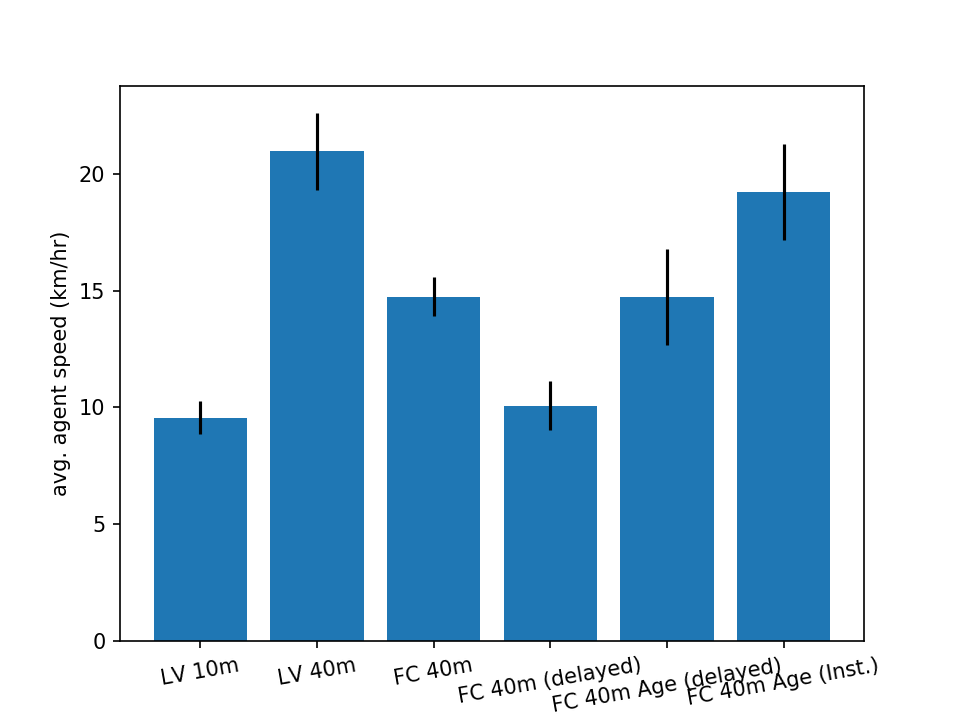

In [30]:
xticks = ['LV 10m', 'LV 40m', 'FC 40m', 'FC 40m (delayed)', 'FC 40m Age (delayed)', 'FC 40m Age (Inst.)']
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=10)
plt.bar([0, 1, 2, 3, 4, 5], [onlyLV10mspeed.mean(), onlyLV40mspeed.mean(), FC40mspeed.mean(), FC40mdelayedspeed.mean(), FC40mAgespeed.mean(), FC40mAgev2speed.mean()], yerr=[onlyLV10mspeed.std(), onlyLV40mspeed.std(), FC40mspeed.std(), FC40mdelayedspeed.std(), FC40mAgespeed.std(), FC40mAgev2speed.std()])
plt.ylabel('avg. agent speed (km/hr)')
plt.show()
#plt.grid()

### No TF case

In [14]:
FC40mspeedDataNoTF = avgSpeed(FC40mDataNoTF)
LV10mspeedDataNoTF = avgSpeed(onlyLV10mDataNoTF)
LV40mspeedDataNoTF = avgSpeed(onlyLV40mDataNoTF)
FC40mAgespeedDataNoTF = avgSpeed(FC40mAgeDataNoTF)
FC40mAgev2speedDataNoTF = avgSpeed(FC40mAgev2DataNoTF)
FC40mdelayedspeedDataNoTF = avgSpeed(FC40mdelayedDataNoTF)

Complete episodes : 0.91
73/80
Complete episodes : 0.99
79/80
Complete episodes : 0.99
79/80
Complete episodes : 0.85
171/200
Complete episodes : 0.92
184/200
Complete episodes : 0.92
183/200


In [15]:
print(FC40mspeedDataNoTF['complete'].shape)
print(LV10mspeedDataNoTF['complete'].shape)
print(LV40mspeedDataNoTF['complete'].shape)
print(FC40mAgespeedDataNoTF['complete'].shape)
print(FC40mAgev2speedDataNoTF['complete'].shape)
print(FC40mdelayedspeedDataNoTF['complete'].shape)

(73, 2201)
(79, 2201)
(79, 2201)
(171, 2201)
(184, 2201)
(183, 2201)


## Percentage of planning actions

In [16]:
def getPlanActStats(dataDict):
    data = {}
    data['complete'] = []
    data['not-complete'] = []
    
    for episode in dataDict['data'][episodesDensity].keys():
        actData = dataDict['data'][episodesDensity][episode]['actions']
        epLen = len(actData)
        if epLen == dataDict['max-episode-length']:
            data['complete'].append(actData)
        else:
            data['not-complete'].append(actData)
    totalEpisodes = len(data['complete']) + len(data['not-complete'])
    print("Complete episodes : %.2f"%(len(data['complete'])/totalEpisodes))
    print("%d/%d"%(len(data['complete']), totalEpisodes))
    return data

In [17]:
planEncode = {}
planEncode['acc'] = 0
planEncode['dec'] = 1
planEncode['do-nothing'] = 2
planEncode['lane-change'] = 3

In [18]:
regs = ['reg_0', 'reg_1', 'null']

In [19]:
def parsePlanActs(episodes, keyMap):
    dataCount = {}
    for key in keyMap:
        dataCount[key] = 0
    
    stepsCount = 0
    for episode in episodes:
        for step in episode:
            dataCount[step[0]] += 1
            stepsCount += 1
    
    # Normalize the dict
    for key in keyMap:
        dataCount[key] /= stepsCount

    # Convert into percentages
    for key in keyMap:
        dataCount[key] *= 100.0
    return dataCount

In [20]:
def parseRegs(episodes, keyMap):
    dataCount = {}
    for key in keyMap:
        dataCount[key] = 0
    
    stepsCount = 0
    for episode in episodes:
        for step in episode:
            dataCount[step[1]] += 1
            stepsCount += 1
    
    # Normalize the dict
    for key in keyMap:
        dataCount[key] /= stepsCount
    
    # Convert into percentages
    for key in keyMap:
        dataCount[key] *= 100.0
    return dataCount

In [21]:
onlyLV10mActsStat = getPlanActStats(onlyLV10mData)
onlyLV10mplanActs = parsePlanActs(onlyLV10mActsStat['complete'],planEncode)
print(onlyLV10mplanActs)

Complete episodes : 0.84
42/50
{'acc': 54.32251082251083, 'dec': 26.886363636363637, 'do-nothing': 18.76731601731602, 'lane-change': 0.023809523809523808}


In [22]:
onlyLV40mActsStat = getPlanActStats(onlyLV40mData)
onlyLV40mplanActs = parsePlanActs(onlyLV40mActsStat['complete'], planEncode)
print(onlyLV40mplanActs)

Complete episodes : 0.66
33/50
{'acc': 31.94490358126722, 'dec': 17.431129476584022, 'do-nothing': 43.24517906336089, 'lane-change': 7.378787878787879}


In [23]:
FC40mActsStat = getPlanActStats(FC40mData)
FC40mplanActs = parsePlanActs(FC40mActsStat['complete'], planEncode)
FC40mcommActs = parseRegs(FC40mActsStat['complete'], regs)

Complete episodes : 0.69
55/80


In [24]:
FC40mAgeActsStat = getPlanActStats(FC40mAgeData)
FC40mAgeplanActs = parsePlanActs(FC40mAgeActsStat['complete'], planEncode)
FC40mAgecommActs = parseRegs(FC40mAgeActsStat['complete'], regs)

Complete episodes : 0.59
118/200


In [25]:
FC40mAgev2ActsStat = getPlanActStats(FC40mAgev2Data)
FC40mAgev2planActs = parsePlanActs(FC40mAgev2ActsStat['complete'], planEncode)
FC40mAgev2commActs = parseRegs(FC40mAgev2ActsStat['complete'], regs)

Complete episodes : 0.62
125/200


In [27]:
FC40mdelayedActsStat = getPlanActStats(FC40mdelayedData)
FC40mdelayedplanActs = parsePlanActs(FC40mdelayedActsStat['complete'], planEncode)
FC40mdelayedcommActs = parseRegs(FC40mdelayedActsStat['complete'], regs)

Complete episodes : 0.66
132/200


In [28]:
FC40mAgev2commActs

{'reg_0': 42.23018181818182,
 'reg_1': 31.58909090909091,
 'null': 26.18072727272727}

<IPython.core.display.Javascript object>


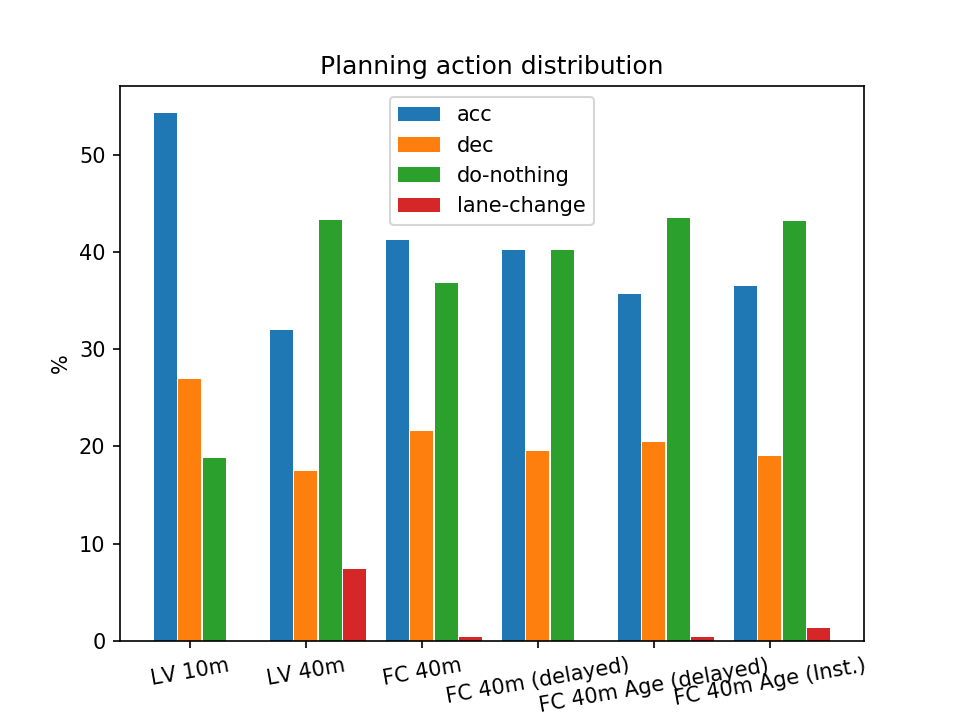

In [31]:
accBar = [onlyLV10mplanActs['acc'], onlyLV40mplanActs['acc'], FC40mplanActs['acc'], FC40mdelayedplanActs['acc'], FC40mAgeplanActs['acc'], FC40mAgev2planActs['acc'],]
decBar = [onlyLV10mplanActs['dec'], onlyLV40mplanActs['dec'], FC40mplanActs['dec'], FC40mdelayedplanActs['dec'], FC40mAgeplanActs['dec'], FC40mAgev2planActs['dec']]
laneChangeBar = [onlyLV10mplanActs['lane-change'], onlyLV40mplanActs['lane-change'], FC40mplanActs['lane-change'], FC40mdelayedplanActs['lane-change'], FC40mAgeplanActs['lane-change'], FC40mAgev2planActs['lane-change']]
nothingBar = [onlyLV10mplanActs['do-nothing'], onlyLV40mplanActs['do-nothing'], FC40mplanActs['do-nothing'], FC40mdelayedplanActs['do-nothing'], FC40mAgeplanActs['do-nothing'], FC40mAgev2planActs['do-nothing']]
plt.bar(np.array([0, 1, 2, 3, 4, 5]) - 0.21, accBar, width=0.2, label='acc')
plt.bar(np.array([0, 1, 2, 3, 4, 5]), decBar, width=0.2, label='dec')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.21, nothingBar, width=0.2, label='do-nothing')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.42, laneChangeBar, width=0.2, label='lane-change')
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=10)
plt.legend()
plt.ylabel('%')
plt.title('Planning action distribution')
plt.show()

<IPython.core.display.Javascript object>


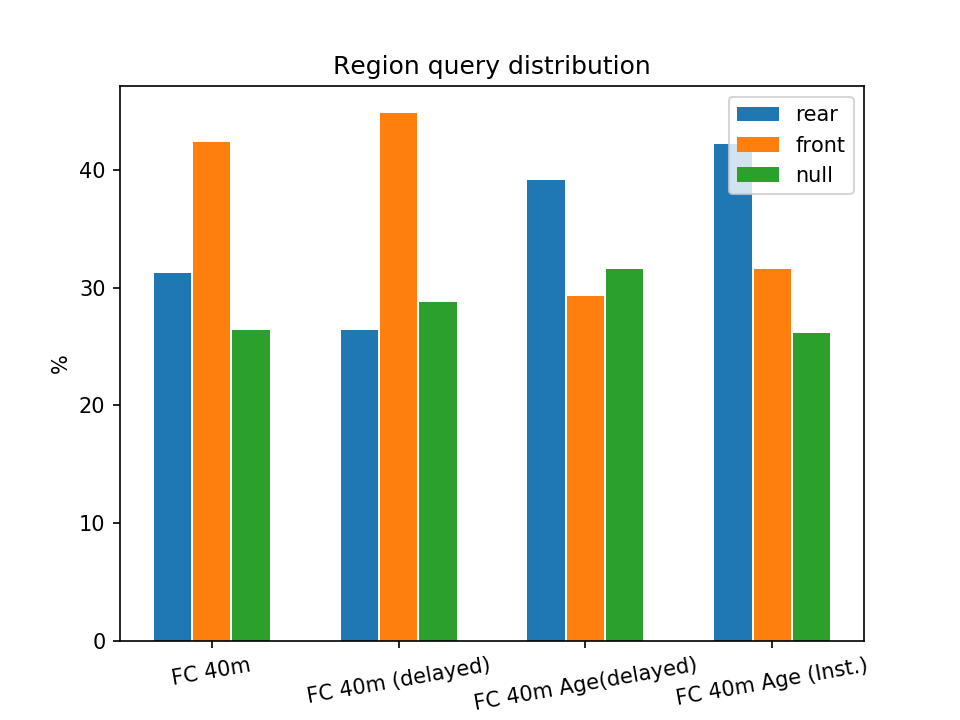

In [36]:
rearBar = [FC40mcommActs['reg_0'], FC40mdelayedcommActs['reg_0'] ,FC40mAgecommActs['reg_0'], FC40mAgev2commActs['reg_0']]
frontBar = [FC40mcommActs['reg_1'], FC40mdelayedcommActs['reg_1'], FC40mAgecommActs['reg_1'], FC40mAgev2commActs['reg_1']]
nullBar = [FC40mcommActs['null'], FC40mdelayedcommActs['null'] ,FC40mAgecommActs['null'], FC40mAgev2commActs['null']]

xticks = ['FC 40m', 'FC 40m (delayed)' ,'FC 40m Age(delayed)', 'FC 40m Age (Inst.)']
plt.xticks([0, 1, 2, 3], xticks, rotation=10)
plt.bar(np.arange(0, len([0, 1, 2, 3])) - 0.21, rearBar, width=0.2, label='rear')
plt.bar(np.arange(0, len([0, 1, 2, 3])), frontBar, width=0.2, label='front')
plt.bar(np.arange(0, len([0, 1, 2, 3])) + 0.21, nullBar, width=0.2, label='null')
plt.legend()
plt.ylabel('%')
plt.title('Region query distribution')
plt.show()

## Agent speed as function of time

### with TF

<IPython.core.display.Javascript object>


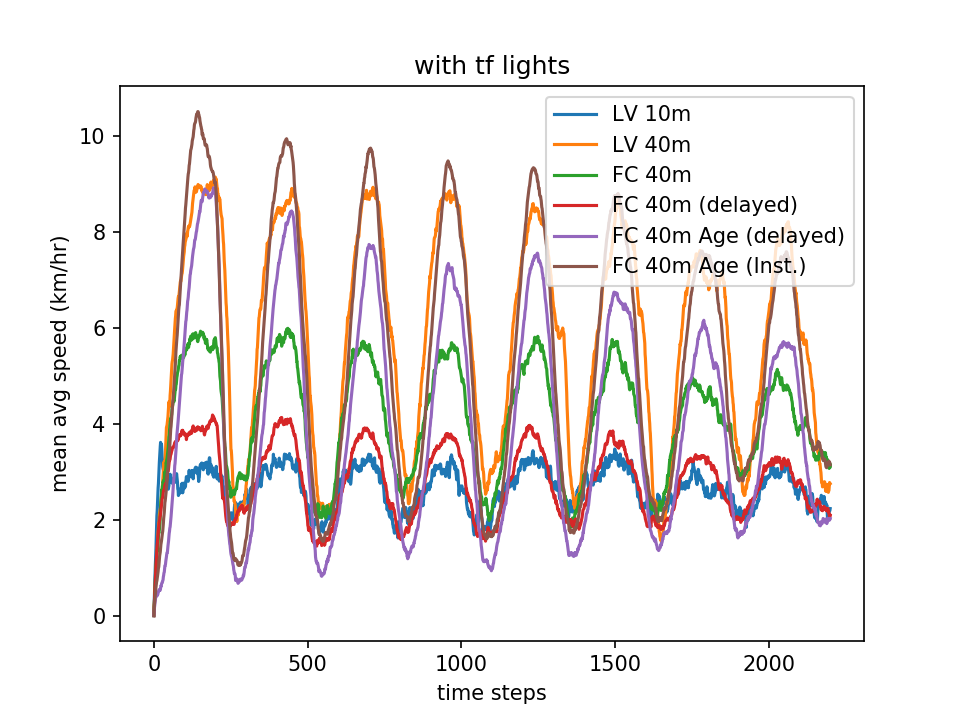

In [39]:
plt.plot(onlyLV10mspeedData['complete'].mean(axis=0), label='LV 10m')
plt.plot(onlyLV40mspeedData['complete'].mean(axis=0), label='LV 40m')
plt.plot(FC40mspeedData['complete'].mean(axis=0), label='FC 40m')
plt.plot(FC40mdelayedspeedData['complete'].mean(axis=0), label='FC 40m (delayed)')
plt.plot(FC40mAgespeedData['complete'].mean(axis=0), label='FC 40m Age (delayed)')
plt.plot(FC40mAgev2speedData['complete'].mean(axis=0), label='FC 40m Age (Inst.)')

plt.xlabel('time steps')
plt.legend()
plt.title("with tf lights")
plt.ylabel('mean avg speed (km/hr)')
plt.show()

## Age comparison

In [40]:
def getAgeVector(dataDict, trueAge=True):
    data = {}
    data['complete'] = []
    data['not-complete'] = []
    
    for episode in dataDict['data'][episodesDensity].keys():
        if trueAge:
            ageVec = dataDict['data'][episodesDensity][episode]['trueAge']
        else:
            ageVec = dataDict['data'][episodesDensity][episode]['agentAge']
        
        epLen = len(ageVec)
        if epLen == dataDict['max-episode-length']:
            data['complete'].append(ageVec)
        else:
            data['not-complete'].append(ageVec)
    
    return data

In [41]:
FC40mAgeTrueAgeData = getAgeVector(FC40mAgeData)
FC40mAgeAgentAgeData = getAgeVector(FC40mAgeData, trueAge=False)

In [42]:
FC40mAgev2TrueAgeData = getAgeVector(FC40mAgev2Data)
FC40mAgev2AgentAgeData = getAgeVector(FC40mAgev2Data, trueAge=False)

<IPython.core.display.Javascript object>


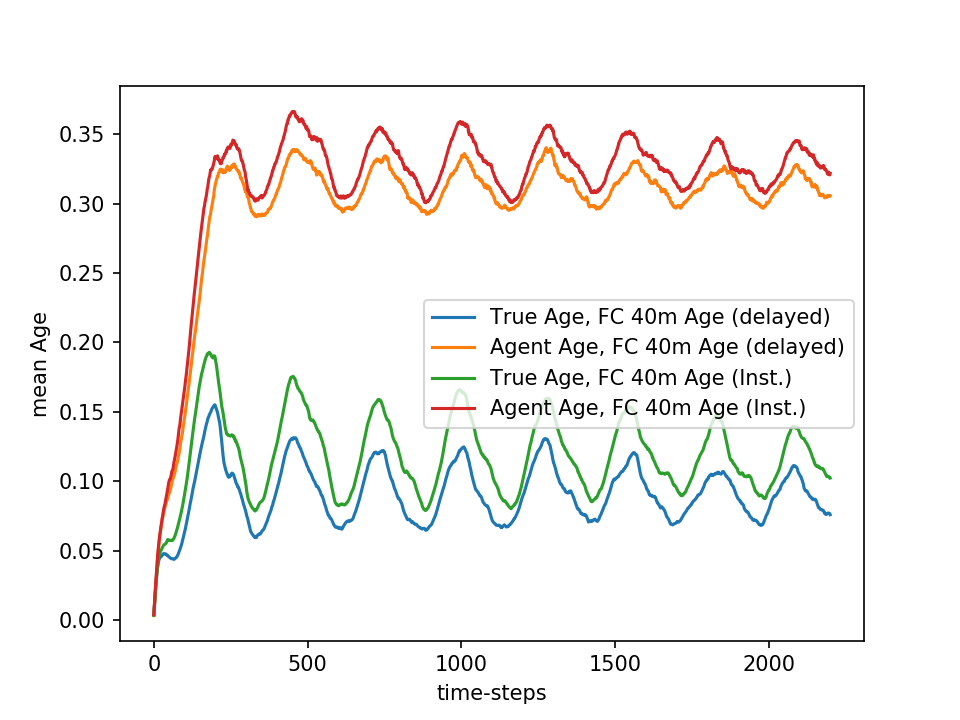

[]

In [53]:
plt.plot(np.array(FC40mAgeTrueAgeData['complete']).mean(axis=0), label="True Age, FC 40m Age (delayed)")
plt.plot(np.array(FC40mAgeAgentAgeData['complete']).mean(axis=0), label="Agent Age, FC 40m Age (delayed)")
plt.plot(np.array(FC40mAgev2TrueAgeData['complete']).mean(axis=0), label="True Age, FC 40m Age (Inst.)")
plt.plot(np.array(FC40mAgev2AgentAgeData['complete']).mean(axis=0), label="Agent Age, FC 40m Age (Inst.)")
plt.legend()
plt.ylabel('mean Age')
plt.xlabel('time-steps')
plt.plot()

In [40]:
'''
plt.plot(np.array(FC40mAgeTrueAgeData['complete']).mean(axis=0), label="True Age, Age FC 40m")
plt.plot(np.array(FC40mAgev2TrueAgeData['complete']).mean(axis=0), label="True Age, Age v2 FC 40m")
plt.plot(FC40mAgev2speedData['complete'].mean(axis=0)/15.0, label='Agent mean speed, Age v2 FC 40m')
plt.plot(FC40mAgespeedData['complete'].mean(axis=0)/15.0, label='Agent mean speed, Age FC 40m')
plt.legend()
plt.xlabel('time-steps')
plt.grid()
plt.show()
'''

'\nplt.plot(np.array(FC40mAgeTrueAgeData[\'complete\']).mean(axis=0), label="True Age, Age FC 40m")\nplt.plot(np.array(FC40mAgev2TrueAgeData[\'complete\']).mean(axis=0), label="True Age, Age v2 FC 40m")\nplt.plot(FC40mAgev2speedData[\'complete\'].mean(axis=0)/15.0, label=\'Agent mean speed, Age v2 FC 40m\')\nplt.plot(FC40mAgespeedData[\'complete\'].mean(axis=0)/15.0, label=\'Agent mean speed, Age FC 40m\')\nplt.legend()\nplt.xlabel(\'time-steps\')\nplt.grid()\nplt.show()\n'

<h1 align="center"> Without traffic lights </h1>

# Assert episode density of all cases

In [44]:
assert list(onlyLV10mDataNoTF['data'].keys())[0] == episodesDensity
assert list(onlyLV40mDataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mDataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mAgeDataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mAgev2DataNoTF['data'].keys())[0] == episodesDensity
assert list(FC40mdelayedDataNoTF['data'].keys())[0] == episodesDensity

# Agent average speed comparison

In [45]:
onlyLV10mspeedDataNoTF = avgSpeed(onlyLV10mDataNoTF)
onlyLV10mspeedNoTF = onlyLV10mspeedDataNoTF['complete'].sum(axis=1) / onlyLV10mspeedDataNoTF['complete'].shape[1]
onlyLV10mspeedNoTF *= 3.6

Complete episodes : 0.99
79/80


In [46]:
onlyLV40mspeedDataNoTF = avgSpeed(onlyLV40mDataNoTF)
onlyLV40mspeedNoTF = onlyLV40mspeedDataNoTF['complete'].sum(axis=1) / onlyLV40mspeedDataNoTF['complete'].shape[1]
onlyLV40mspeedNoTF *= 3.6

Complete episodes : 0.99
79/80


In [47]:
FC40mspeedDataNoTF = avgSpeed(FC40mDataNoTF)
FC40mspeedNoTF = FC40mspeedDataNoTF['complete'].sum(axis=1) / FC40mspeedDataNoTF['complete'].shape[1]
FC40mspeedNoTF *= 3.6

Complete episodes : 0.91
73/80


In [48]:
FC40mAgespeedDataNoTF = avgSpeed(FC40mAgeDataNoTF)
FC40mAgespeedNoTF = FC40mAgespeedDataNoTF['complete'].sum(axis=1) / FC40mAgespeedDataNoTF['complete'].shape[1]
FC40mAgespeedNoTF *= 3.6

Complete episodes : 0.85
171/200


In [49]:
FC40mAgev2speedDataNoTF = avgSpeed(FC40mAgev2DataNoTF)
FC40mAgev2speedNoTF = FC40mAgev2speedDataNoTF['complete'].sum(axis=1) / FC40mAgev2speedDataNoTF['complete'].shape[1]
FC40mAgev2speedNoTF *= 3.6

Complete episodes : 0.92
184/200


In [51]:
FC40mdelayedspeedDataNoTF = avgSpeed(FC40mdelayedDataNoTF)
FC40mdelayedspeedNoTF = FC40mdelayedspeedDataNoTF['complete'].sum(axis=1) / FC40mdelayedspeedDataNoTF['complete'].shape[1]
FC40mdelayedspeedNoTF *= 3.6

Complete episodes : 0.92
183/200


<IPython.core.display.Javascript object>


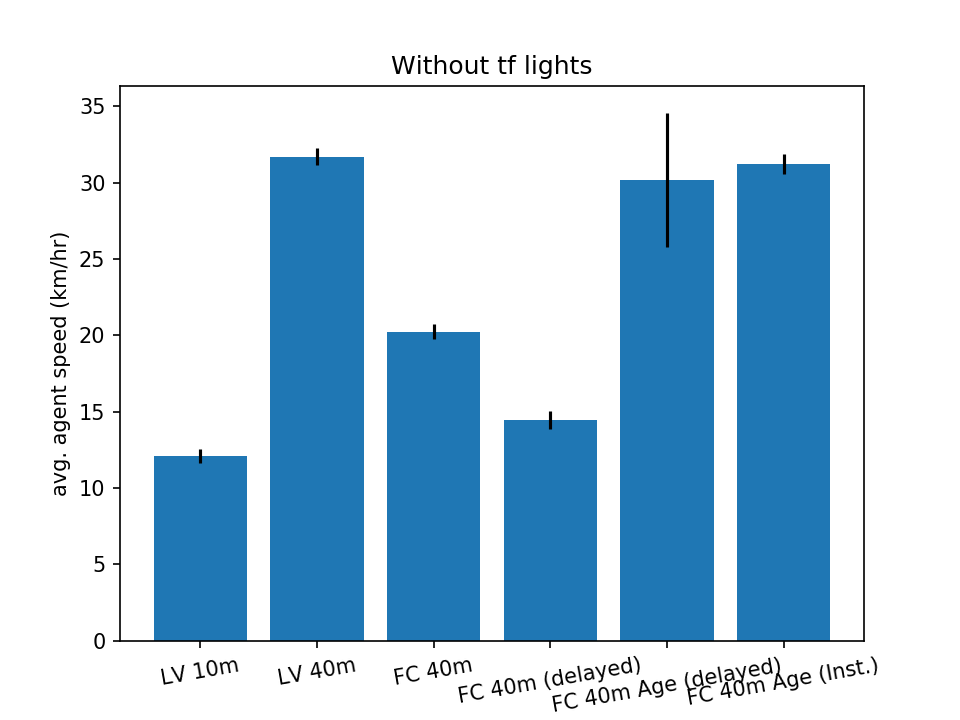

In [54]:
xticks = ['LV 10m', 'LV 40m', 'FC 40m', 'FC 40m (delayed)' ,'FC 40m Age (delayed)', 'FC 40m Age (Inst.)']
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=10)
plt.bar([0, 1, 2, 3, 4, 5], [onlyLV10mspeedNoTF.mean(), onlyLV40mspeedNoTF.mean(), FC40mspeedNoTF.mean(), FC40mdelayedspeedNoTF.mean(), FC40mAgespeedNoTF.mean(), FC40mAgev2speedNoTF.mean()], yerr=[onlyLV10mspeedNoTF.std(), onlyLV40mspeedNoTF.std(), FC40mspeedNoTF.std(), FC40mdelayedspeedNoTF.std(), FC40mAgespeedNoTF.std(), FC40mAgev2speedNoTF.std()])
plt.ylabel('avg. agent speed (km/hr)')
plt.title("Without tf lights")
plt.show()
#plt.grid()

# Action Distribution

In [55]:
onlyLV10mActsStatNoTF = getPlanActStats(onlyLV10mDataNoTF)
onlyLV10mplanActsNoTF = parsePlanActs(onlyLV10mActsStatNoTF['complete'],planEncode)
print(onlyLV10mplanActsNoTF)

Complete episodes : 0.99
79/80
{'acc': 57.0638665132336, 'dec': 25.07825086306099, 'do-nothing': 17.83199079401611, 'lane-change': 0.025891829689298044}


In [56]:
onlyLV40mActsStatNoTF = getPlanActStats(onlyLV40mDataNoTF)
onlyLV40mplanActsNoTF = parsePlanActs(onlyLV40mActsStatNoTF['complete'], planEncode)
print(onlyLV40mplanActsNoTF)

Complete episodes : 0.99
79/80
{'acc': 18.75546605293441, 'dec': 7.773878020713464, 'do-nothing': 53.0644418872267, 'lane-change': 20.40621403912543}


In [57]:
FC40mActsStatNoTF = getPlanActStats(FC40mDataNoTF)
FC40mplanActsNoTF = parsePlanActs(FC40mActsStatNoTF['complete'], planEncode)
FC40mcommActsNoTF = parseRegs(FC40mActsStatNoTF['complete'], regs)

Complete episodes : 0.91
73/80


In [58]:
FC40mAgeActsStatNoTF = getPlanActStats(FC40mAgeDataNoTF)
FC40mAgeplanActsNoTF = parsePlanActs(FC40mAgeActsStatNoTF['complete'], planEncode)
FC40mAgecommActsNoTF = parseRegs(FC40mAgeActsStatNoTF['complete'], regs)

Complete episodes : 0.85
171/200


In [59]:
FC40mAgev2ActsStatNoTF = getPlanActStats(FC40mAgev2DataNoTF)
FC40mAgev2planActsNoTF = parsePlanActs(FC40mAgev2ActsStatNoTF['complete'], planEncode)
FC40mAgev2commActsNoTF = parseRegs(FC40mAgev2ActsStatNoTF['complete'], regs)

Complete episodes : 0.92
184/200


In [60]:
FC40mdelayedActsStatNoTF = getPlanActStats(FC40mdelayedDataNoTF)
FC40mdelayedplanActsNoTF = parsePlanActs(FC40mdelayedActsStatNoTF['complete'], planEncode)
FC40mdelayedcommActsNoTF = parseRegs(FC40mdelayedActsStatNoTF['complete'], regs)

Complete episodes : 0.92
183/200


In [62]:
FC40mdelayedplanActsNoTF

{'acc': 39.18032786885246,
 'dec': 16.87009438648783,
 'do-nothing': 43.92970690511674,
 'lane-change': 0.01987083954297069}

<IPython.core.display.Javascript object>


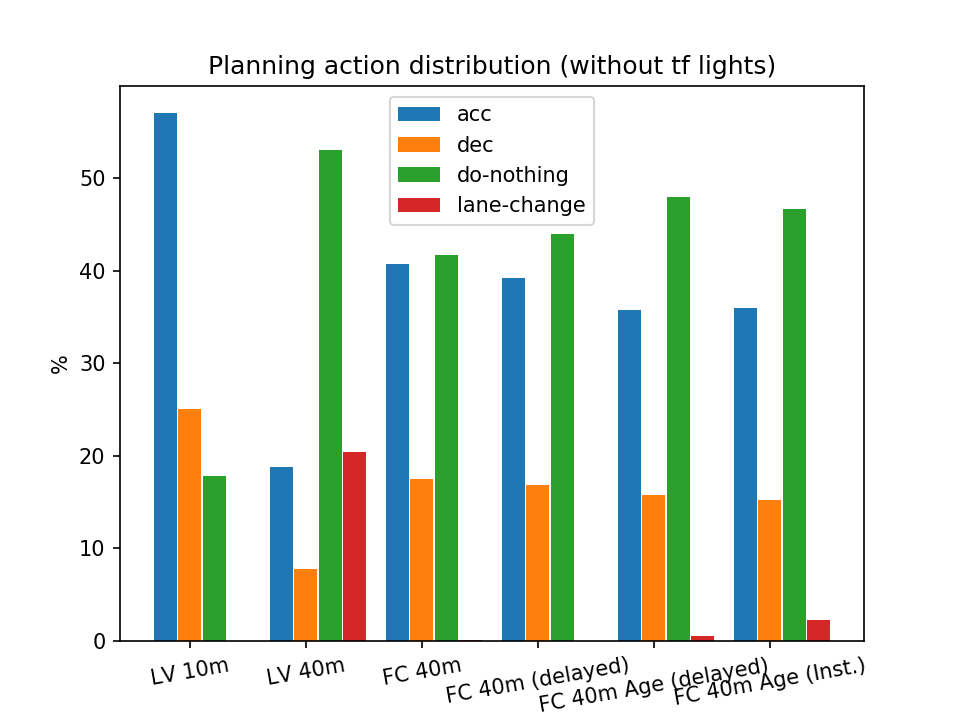

In [61]:
accBar = [onlyLV10mplanActsNoTF['acc'], onlyLV40mplanActsNoTF['acc'], FC40mplanActsNoTF['acc'], FC40mdelayedplanActsNoTF['acc'] ,FC40mAgeplanActsNoTF['acc'], FC40mAgev2planActsNoTF['acc']]
decBar = [onlyLV10mplanActsNoTF['dec'], onlyLV40mplanActsNoTF['dec'], FC40mplanActsNoTF['dec'], FC40mdelayedplanActsNoTF['dec'] ,FC40mAgeplanActsNoTF['dec'], FC40mAgev2planActsNoTF['dec']]
laneChangeBar = [onlyLV10mplanActsNoTF['lane-change'], onlyLV40mplanActsNoTF['lane-change'], FC40mplanActsNoTF['lane-change'], FC40mdelayedplanActsNoTF['lane-change'], FC40mAgeplanActsNoTF['lane-change'], FC40mAgev2planActsNoTF['lane-change']]
nothingBar = [onlyLV10mplanActsNoTF['do-nothing'], onlyLV40mplanActsNoTF['do-nothing'], FC40mplanActsNoTF['do-nothing'], FC40mdelayedplanActsNoTF['do-nothing'], FC40mAgeplanActsNoTF['do-nothing'], FC40mAgev2planActsNoTF['do-nothing']]
plt.bar(np.array([0, 1, 2, 3, 4, 5]) - 0.21, accBar, width=0.2, label='acc')
plt.bar(np.array([0, 1, 2, 3, 4, 5]), decBar, width=0.2, label='dec')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.21, nothingBar, width=0.2, label='do-nothing')
plt.bar(np.array([0, 1, 2, 3, 4, 5]) + 0.42, laneChangeBar, width=0.2, label='lane-change')
plt.xticks([0, 1, 2, 3, 4, 5], xticks, rotation=10)
plt.legend()
plt.ylabel('%')
plt.title('Planning action distribution (without tf lights)')
plt.show()

<IPython.core.display.Javascript object>


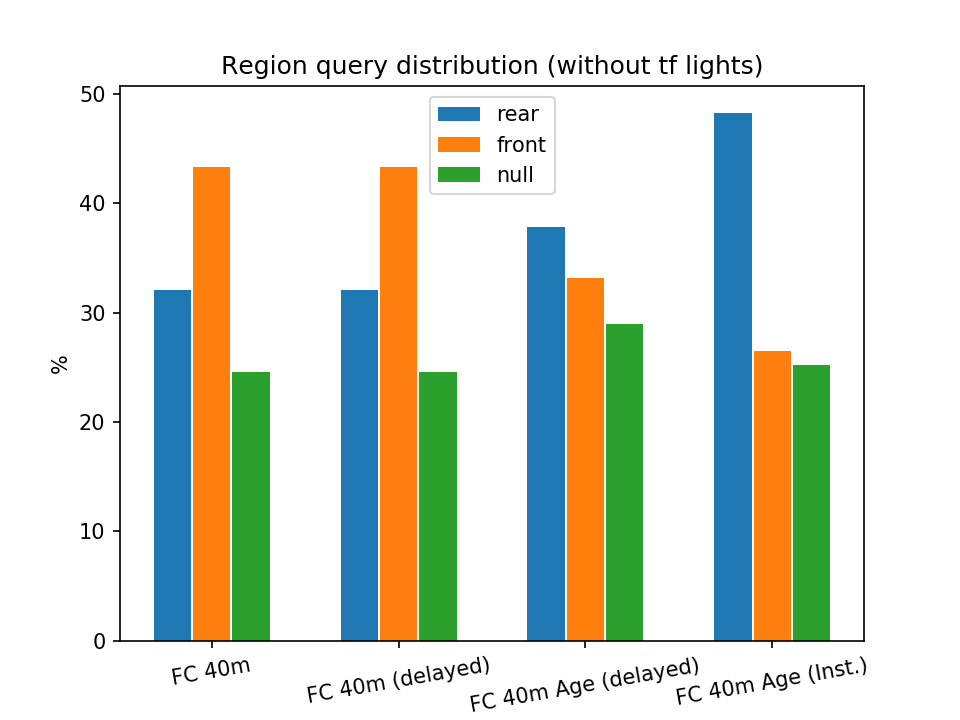

In [64]:
rearBar = [FC40mcommActsNoTF['reg_0'], FC40mcommActsNoTF['reg_0'] ,FC40mAgecommActsNoTF['reg_0'], FC40mAgev2commActsNoTF['reg_0']]
frontBar = [FC40mcommActsNoTF['reg_1'], FC40mcommActsNoTF['reg_1'] ,FC40mAgecommActsNoTF['reg_1'], FC40mAgev2commActsNoTF['reg_1']]
nullBar = [FC40mcommActsNoTF['null'], FC40mcommActsNoTF['null'] ,FC40mAgecommActsNoTF['null'], FC40mAgev2commActsNoTF['null']]

xticks = ['FC 40m', 'FC 40m (delayed)', 'FC 40m Age (delayed)', 'FC 40m Age (Inst.)']
plt.xticks([0, 1, 2, 3], xticks, rotation=10)
plt.bar(np.arange(0, len([0, 1, 2, 3])) - 0.21, rearBar, width=0.2, label='rear')
plt.bar(np.arange(0, len([0, 1, 2, 3])), frontBar, width=0.2, label='front')
plt.bar(np.arange(0, len([0, 1, 2, 3])) + 0.21, nullBar, width=0.2, label='null')
plt.legend()
plt.ylabel('%')
plt.title('Region query distribution (without tf lights)')
plt.show()

### Without TF

<IPython.core.display.Javascript object>


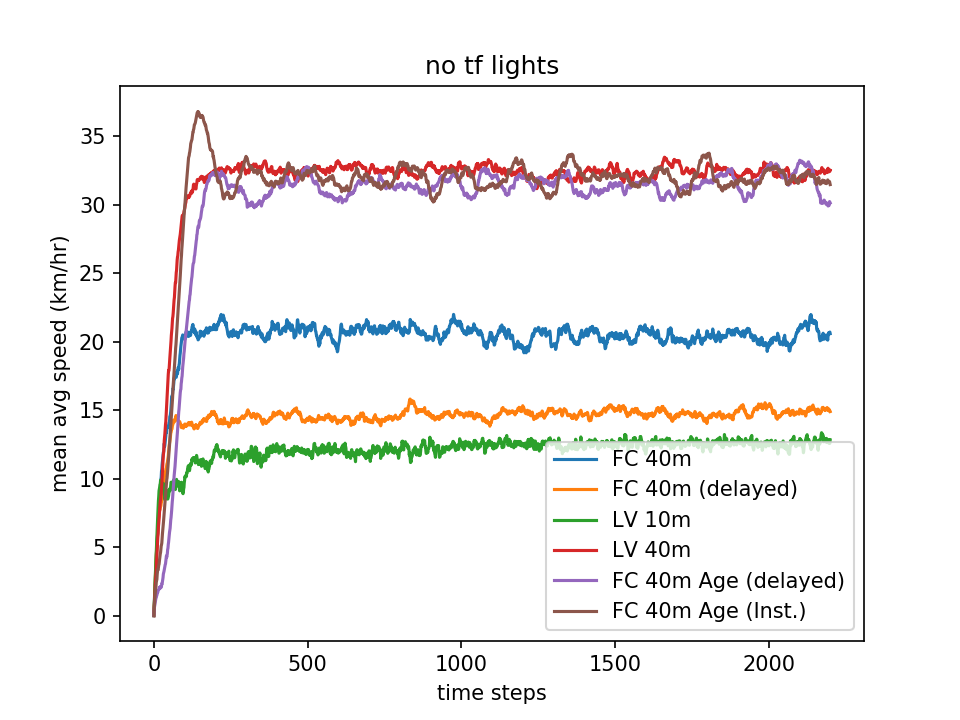

In [66]:
plt.plot(FC40mspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC 40m')
plt.plot(FC40mdelayedspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC 40m (delayed)')
plt.plot(LV10mspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='LV 10m')
plt.plot(LV40mspeedDataNoTF['complete'].mean(axis=0) * 3.6, label='LV 40m')
plt.plot(FC40mAgespeedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC 40m Age (delayed)')
plt.plot(FC40mAgev2speedDataNoTF['complete'].mean(axis=0) * 3.6, label='FC 40m Age (Inst.)')
plt.xlabel('time steps')
plt.legend()
plt.title("no tf lights")
plt.ylabel('mean avg speed (km/hr)')
plt.show()

## Age comparison

In [67]:
FC40mAgeTrueAgeDataNoTF = getAgeVector(FC40mAgeDataNoTF)
FC40mAgeAgentAgeDataNoTF = getAgeVector(FC40mAgeDataNoTF, trueAge=False)

In [68]:
FC40mAgev2TrueAgeDataNoTF = getAgeVector(FC40mAgev2DataNoTF)
FC40mAgev2AgentAgeDataNoTF = getAgeVector(FC40mAgev2DataNoTF, trueAge=False)

<IPython.core.display.Javascript object>


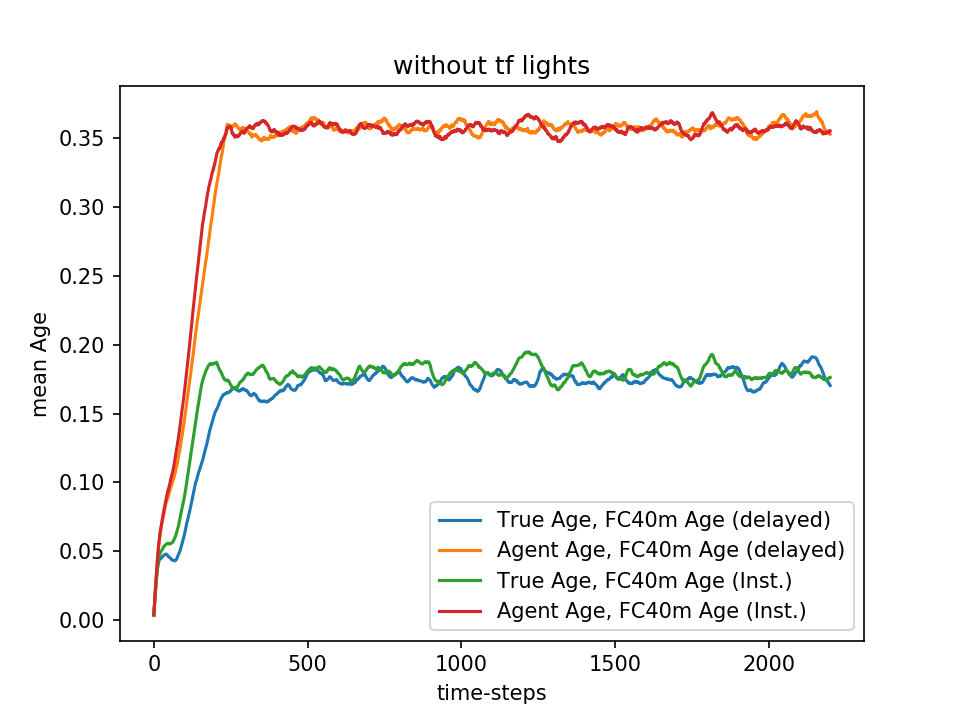

[]

In [69]:
plt.plot(np.arange(np.array(FC40mAgeTrueAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgeTrueAgeDataNoTF['complete']).mean(axis=0), label="True Age, FC40m Age (delayed)")
plt.plot(np.arange(np.array(FC40mAgeAgentAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgeAgentAgeDataNoTF['complete']).mean(axis=0), label="Agent Age, FC40m Age (delayed)")
plt.plot(np.arange(np.array(FC40mAgev2TrueAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgev2TrueAgeDataNoTF['complete']).mean(axis=0), label="True Age, FC40m Age (Inst.) ")
plt.plot(np.arange(np.array(FC40mAgev2TrueAgeDataNoTF['complete']).shape[1]), np.array(FC40mAgev2AgentAgeDataNoTF['complete']).mean(axis=0), label="Agent Age, FC40m Age (Inst.)")
#plt.plot(np.array(FC40mAgeTrueAgeData['complete']).mean(axis=0), label="True Age, with lights")
#plt.plot(np.array(FC40mAgeAgentAgeData['complete']).mean(axis=0), label="Agent Age, with lights")
plt.title("without tf lights")
plt.legend()
plt.ylabel('mean Age')
plt.xlabel('time-steps')
plt.plot()